# Projeto de análise de preço de carros

O exemplo simula uma grande empresa vendedora de carros que pretende ajustar seus preços.

Base de dados de uso livre, disponível em: https://www.kaggle.com/hellbuoy/car-price-prediction .

## Objetivo

### O *objetivo* é estimar o valor dos veículos ou verificar se os valores são competitivos.
##### O algoritmo utilizado será um *regressor* supervisionado, offlline
- O desempenho será medido por MAE, MSE RMSE
- A precisão esperada é de 90%

In [1]:
import pandas as pd

df = pd.read_csv("datasets/CarPrice_Assignment.csv")
df['CarName'] = df['CarName'].str.replace(" ", "") #--- Remove espaços em branco nos nomes dos carros

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romerogiulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romerostelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romeroQuadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi100ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Análise exploratória:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
descr = df.describe()
col_valores = descr.columns
descr

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Um pouco de limpeza de dados...

In [6]:
from sklearn.preprocessing import LabelEncoder

def codifica_categoria(coluna):
    print('Convertendeno coluna  {}'.format(coluna))
    encoder = LabelEncoder()
    df[coluna] = encoder.fit_transform(df[coluna])

    
def ajusta_colunas_str():
    for col in df.columns:
        if col not in col_valores:
            codifica_categoria(col)
            
ajusta_colunas_str()

Convertendeno coluna  CarName
Convertendeno coluna  fueltype
Convertendeno coluna  aspiration
Convertendeno coluna  doornumber
Convertendeno coluna  carbody
Convertendeno coluna  drivewheel
Convertendeno coluna  enginelocation
Convertendeno coluna  enginetype
Convertendeno coluna  cylindernumber
Convertendeno coluna  fuelsystem


## Gerando gráficos
#### De acordo com o tipo de dado (categoria ou valor) é gerado um gráfico, cuja imagem é exportada para a pasta */colunas*

c:\users\fast shop\miniconda3\lib\site-packages\seaborn\axisgrid.py:1675: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


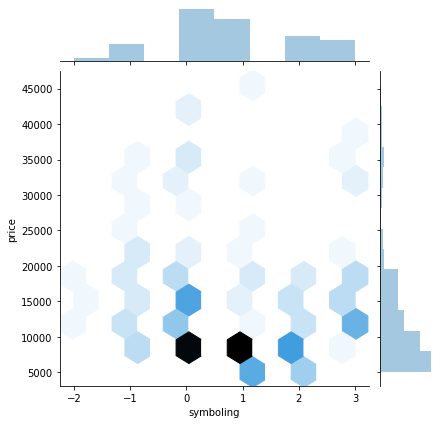

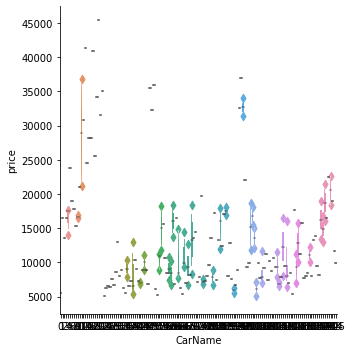

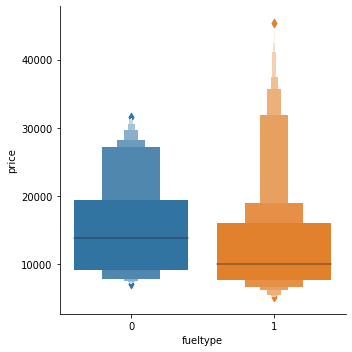

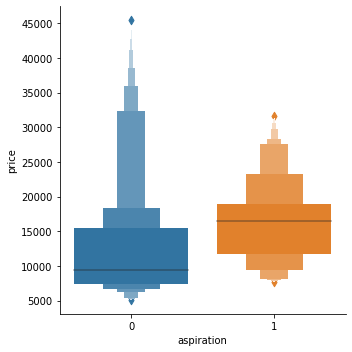

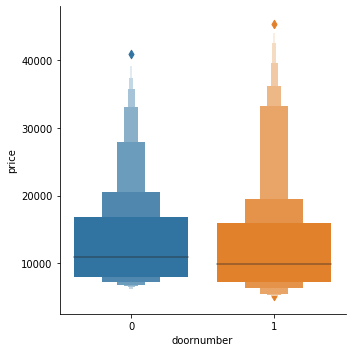

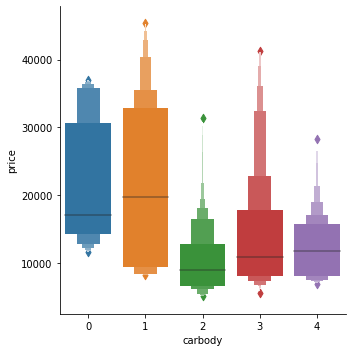

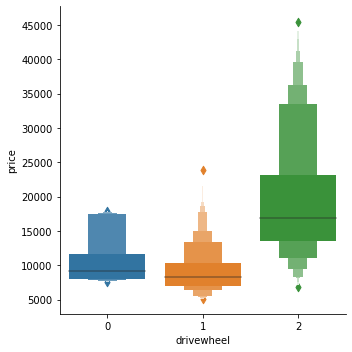

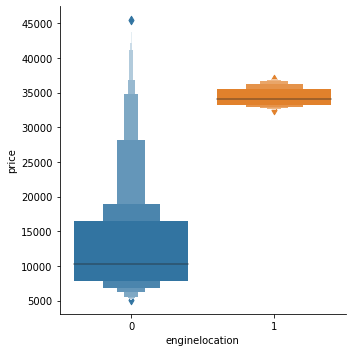

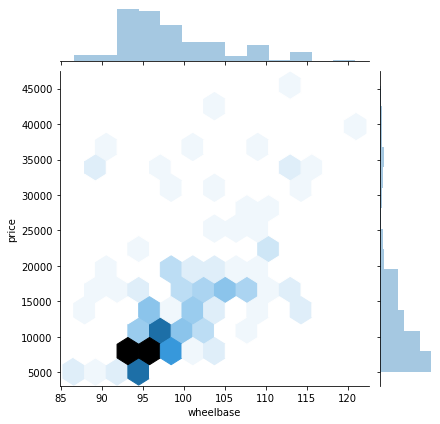

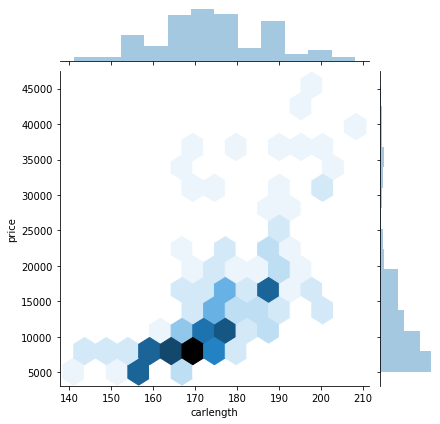

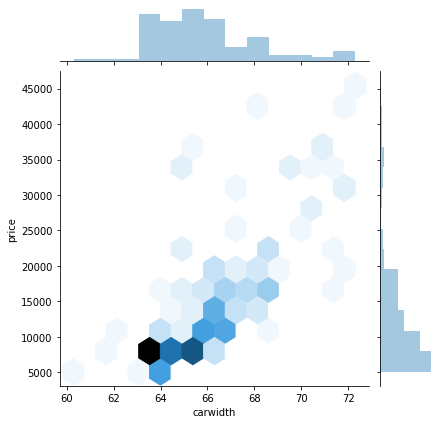

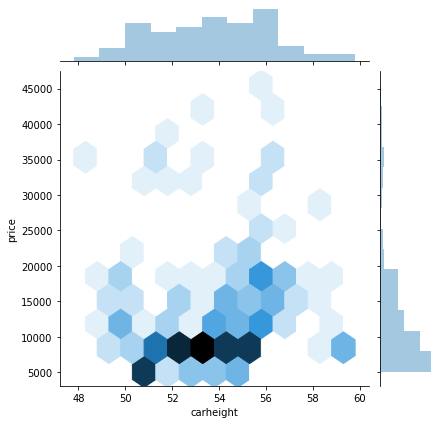

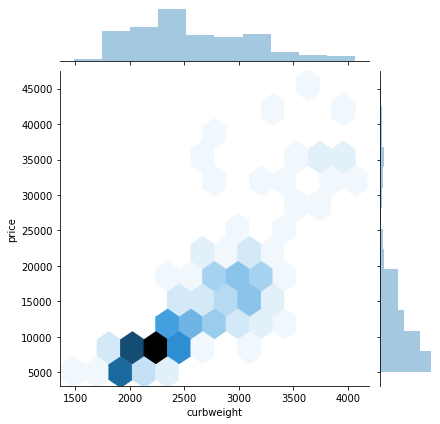

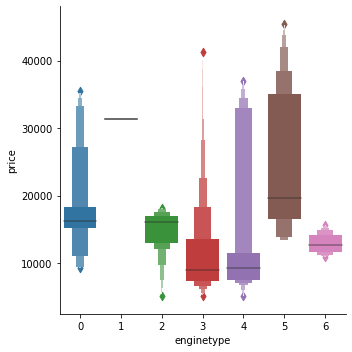

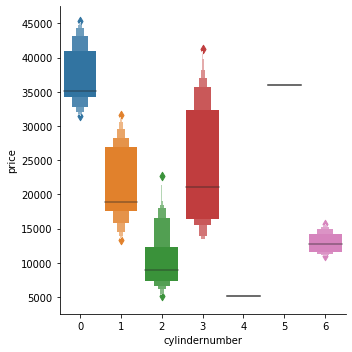

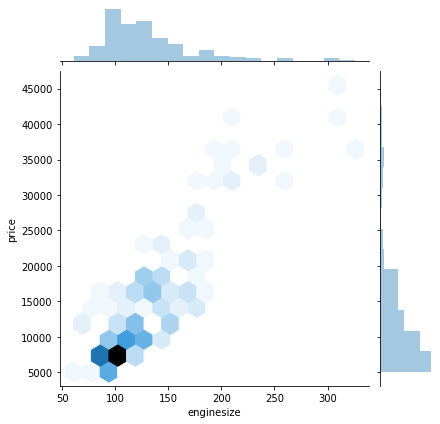

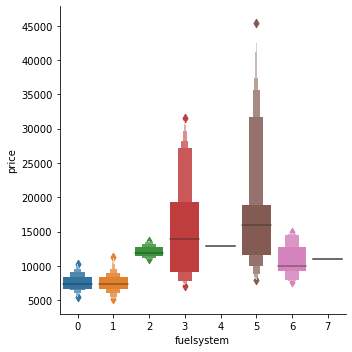

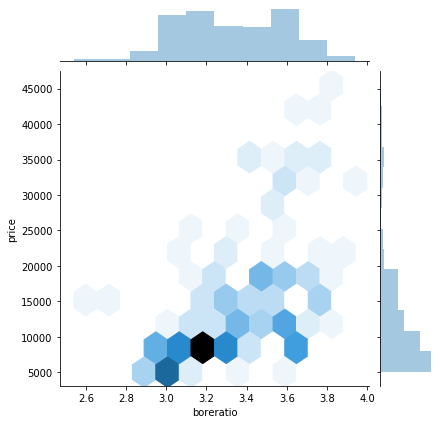

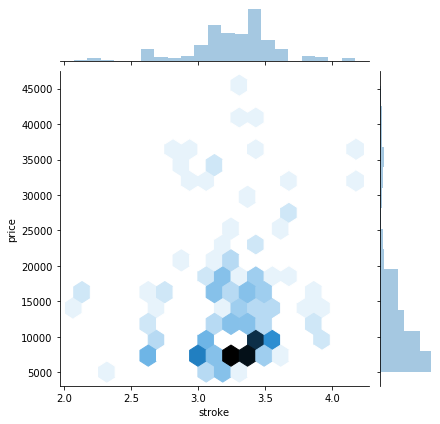

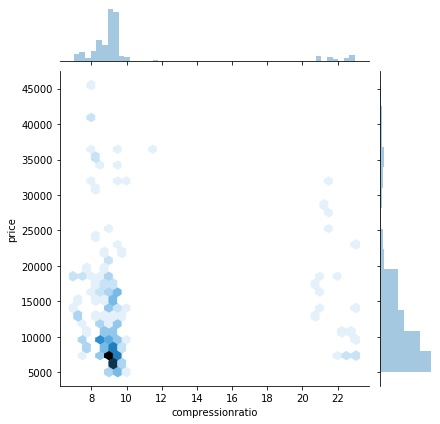

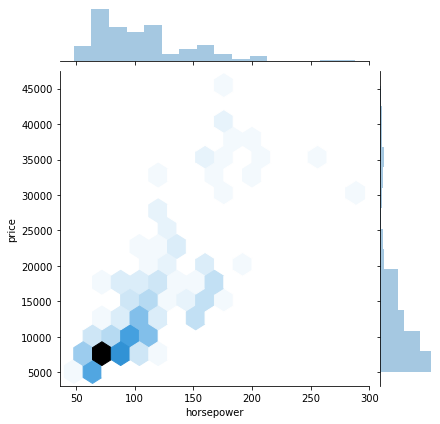

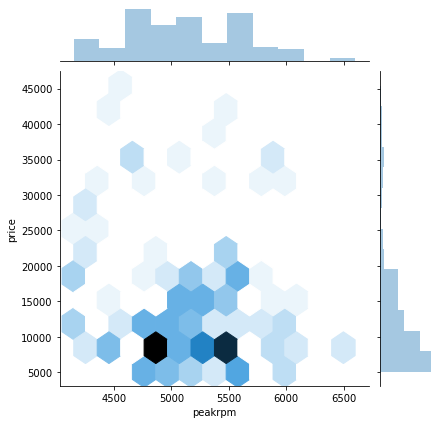

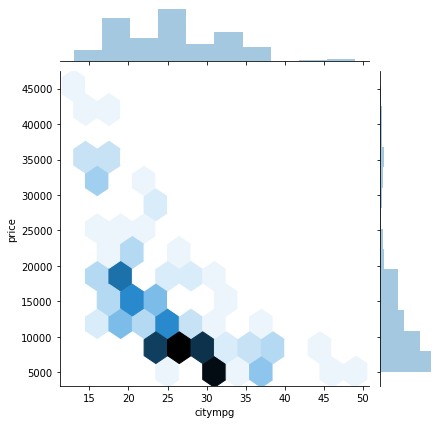

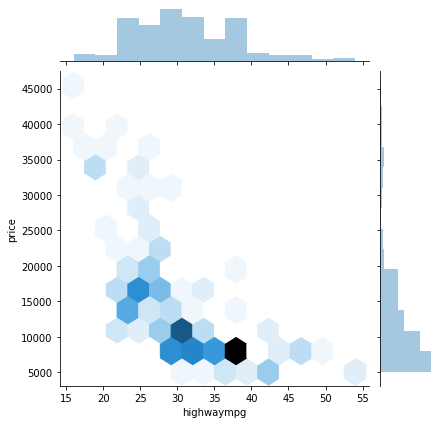

In [8]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

col_alvo = 'price'

for atual_col in df.columns:
    if atual_col in [col_alvo, 'car_ID']:
        continue
    if atual_col in col_valores:
        tipo = 'joint'
        fig = sns.jointplot(data=df, x=atual_col, y=col_alvo, kind='hex')
    else:
        tipo = 'cat'
        fig = sns.catplot(data=df, x=atual_col, y=col_alvo, kind='boxen')
    plt.savefig('colunas/{}_{}.png'.format(tipo, atual_col))

## Ajuste de escala para a regressão

In [9]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['stroke', 'car_ID', 'peakrpm', 'price'], axis=1)
y = df['price'].values

In [10]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Avaliando vários modelos

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy import square

def avalia_modelo(modelo):
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    print('-'*20, modelo.__class__.__name__)
    mae = mean_absolute_error(pred, y_test)
    mse = mean_squared_error(pred, y_test)
    rmse = square(mse)
    print('MAE:  ', mae)
    print('MSE:  ', mse)
    print('RMSE: ', rmse)

avalia_modelo(LinearRegression())
# avalia_modelo(SVR(gamma="auto"))
avalia_modelo(LinearSVR())
avalia_modelo(ElasticNet())
avalia_modelo(Lasso())
avalia_modelo(Ridge())
avalia_modelo(DecisionTreeRegressor())
avalia_modelo(RandomForestRegressor(n_estimators=100))

-------------------- LinearRegression
MAE:   2266.555730552542
MSE:   8555197.081421534
RMSE:  73191397101963.53
-------------------- LinearSVR
MAE:   13271.869173296596
MSE:   243405930.62158033
RMSE:  5.9246447061757576e+16
-------------------- ElasticNet
MAE:   2370.497184083919
MSE:   11010794.932470711
RMSE:  121237605044922.69
-------------------- Lasso
MAE:   2262.7450119245154
MSE:   8531624.602822522
RMSE:  72788618363486.55
-------------------- Ridge
MAE:   2245.0920382990603
MSE:   8401645.831447976
RMSE:  70587652677087.14
-------------------- DecisionTreeRegressor
MAE:   2142.6747258064515
MSE:   9864463.489256274
RMSE:  97307639930870.06
-------------------- RandomForestRegressor
MAE:   1633.8638387096773
MSE:   6150989.766602001
RMSE:  37834675108842.54



### Modelos que apresentaram melhor desempenho:
- LinearRegressor
- Ridge
- DecisionTreeRegressor
- RandomForestRegressor

## Procurando melhores configurações para os modelos

In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'alpha': [1, 1e-1, 1e-2, 1e-3, 1e-4],
    'solver': ['auto', 'sag',],
}
grid = GridSearchCV(Ridge(), params)
grid.fit(X_train, y_train)
ridge_melhor = grid.best_estimator_
grid.best_params_

c:\users\fast shop\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'alpha': 1, 'solver': 'sag'}

In [14]:
params = {
    'max_depth': [1,2,3,4,5,6],
    'max_features': ['auto', 1,2,3,4,5,6]
}
grid = GridSearchCV(DecisionTreeRegressor(), params)
grid.fit(X_train, y_train)
dtr_melhor = grid.best_estimator_
grid.best_params_

c:\users\fast shop\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 2, 'max_features': 4}

In [15]:
params = {
    'max_depth': [2, 5, 6],
    'n_estimators': [10, 100, 200]
}
grid = GridSearchCV(RandomForestRegressor(), params)
grid.fit(X_train, y_train)
rand_melhor = grid.best_estimator_
grid.best_params_

c:\users\fast shop\miniconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 5, 'n_estimators': 100}

In [17]:
from mlxtend.regressor import StackingRegressor

stack = StackingRegressor(regressors=[dtr_melhor, rand_melhor], meta_regressor=ridge_melhor)

avalia_modelo(stack)

-------------------- StackingRegressor
MAE:   1698.324963701955
MSE:   6642029.328130348
RMSE:  44116553595743.68


## Agregando estimadores numa *votação*

In [18]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor([
    ('dtr', dtr_melhor),
    ('rand', rand_melhor),
    ('ridge', ridge_melhor)
])
avalia_modelo(voting)

-------------------- VotingRegressor
MAE:   2118.4148650788457
MSE:   9650373.57862546
RMSE:  93129710207032.36


# Conclusão
## O melhor modelo foi *RandomForestRegressor* SEM nenhum ajuste ou técnica Ensemble